In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# open the txt files and read the data
ev_analysis_H2 = np.loadtxt("diagonal_analysis_eigenvalue_H2.txt")
ev_analysis_uracile = np.loadtxt("diagonal_analysis_eigenvalue_uracil.txt")
ev_analysis_formaldehyde = np.loadtxt("diagonal_analysis_eigenvalue_formaldehyde.txt")

In [3]:
df_H2 = pd.read_csv("diagonal_analysis_detailed_H2.txt", sep=r"\s+", header=None, engine="c")

In [4]:
df_H2.to_parquet("diagonal_analysis_detailed_H2.parquet", engine="pyarrow", compression="snappy")

In [6]:
# --- Step 2: Save as Parquet (fast binary format) ---
df_formaldehyde = pd.read_csv("diagonal_analysis_detailed_formaldehyde.txt", sep=r"\s+", header=None, engine="c")
df_uracil = pd.read_csv("diagonal_analysis_detailed_uracil.txt", sep=r"\s+", header=None, engine="c")

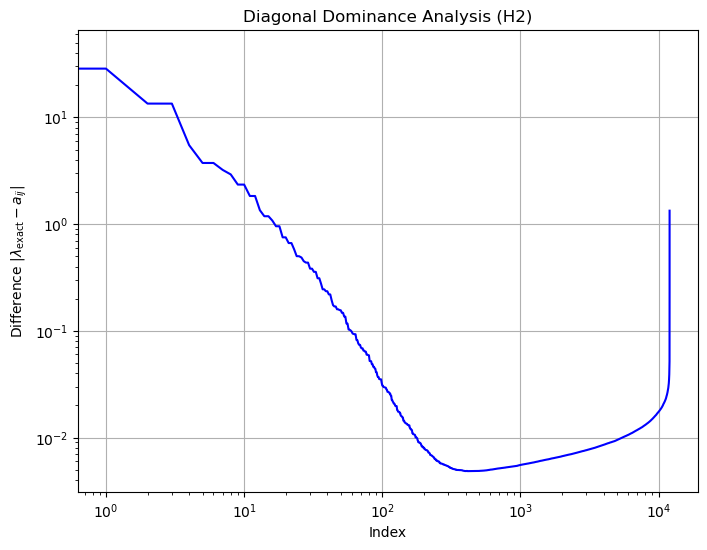

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, len(ev_analysis_H2), len(ev_analysis_H2)), ev_analysis_H2, color='blue')
plt.yscale('log')
plt.xscale('log')
plt.title("Diagonal Dominance Analysis (H2)")
plt.xlabel("Index")
plt.ylabel(r"Difference $|λ_{\text{exact}} - a_{ij}|$")
plt.grid(True)
plt.show()


In [58]:
sns.set_context("notebook")
folder = "Figures"

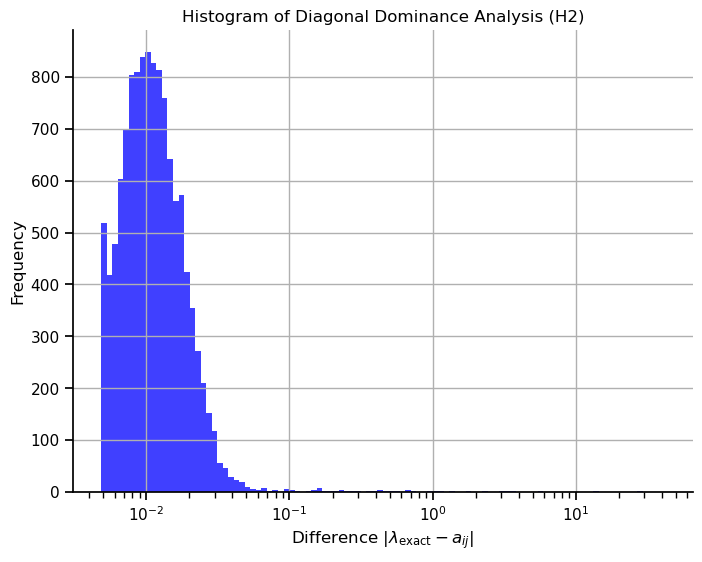

In [59]:
# histogram of the first column
plt.figure(figsize=(8, 6))
bins = np.logspace(np.log10(ev_analysis_H2.min()), np.log10(ev_analysis_H2.max()), num=int(np.log10(ev_analysis_H2.max()) - np.log10(ev_analysis_H2.min()) + 100))
sns.histplot(ev_analysis_H2, bins=bins, color='blue')
plt.xscale('log')
plt.title("Histogram of Diagonal Dominance Analysis (H2)")
plt.xlabel(r"Difference $|λ_{\text{exact}} - a_{ij}|$")
plt.ylabel("Frequency")
plt.grid(True)
sns.despine()
plt.savefig(f"{folder}/histo_diag_dom_H2.pdf")
plt.show()

In [53]:
indices = df_H2.index

sampled_indices = indices[::1000]
sampled_values = df_H2.iloc[sampled_indices]


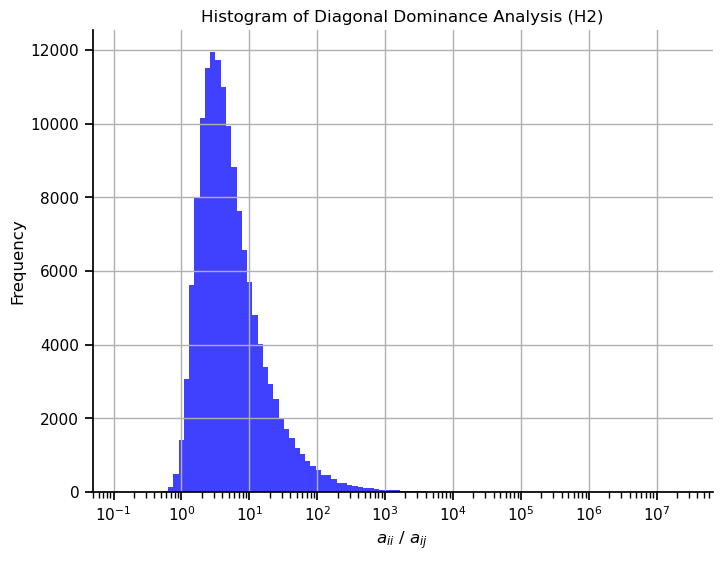

In [60]:
plt.figure(figsize=(8, 6))
bins = np.logspace(np.log10(sampled_values.min()[0]), np.log10(sampled_values.max()[0]), num=int(np.log10(sampled_values.max()[0]) - np.log10(sampled_values.min()[0]) + 100))
sns.histplot(sampled_values[0], bins=bins, color='blue')        
plt.xscale('log')
plt.xlabel(r"$a_{ii}$ / $a_{ij}$")
plt.ylabel("Frequency")
plt.grid(True)
plt.title("Histogram of Diagonal Dominance Analysis (H2)")
sns.despine()
plt.savefig(f"{folder}/histo_diag_dom_H2_sampled.pdf")
plt.show()

# Formaldehyde

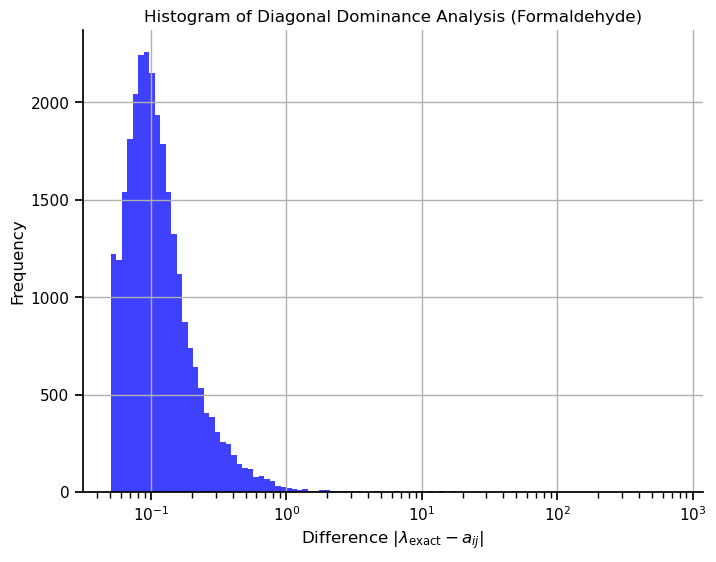

In [61]:
# histogram of the first column
plt.figure(figsize=(8, 6))
bins = np.logspace(np.log10(ev_analysis_formaldehyde.min()), np.log10(ev_analysis_formaldehyde.max()), num=int(np.log10(ev_analysis_formaldehyde.max()) - np.log10(ev_analysis_formaldehyde.min()) + 100))
sns.histplot(ev_analysis_formaldehyde, bins=bins, color='blue')
plt.xscale('log')
plt.title("Histogram of Diagonal Dominance Analysis (Formaldehyde)")
plt.xlabel(r"Difference $|λ_{\text{exact}} - a_{ij}|$")
plt.ylabel("Frequency")
plt.grid(True)
sns.despine()
plt.savefig(f"{folder}/histo_diag_dom_formaldehyde.pdf")
plt.show()

In [62]:
indices = df_formaldehyde.index

sampled_indices = indices[::10000]
sampled_values = df_formaldehyde.iloc[sampled_indices]

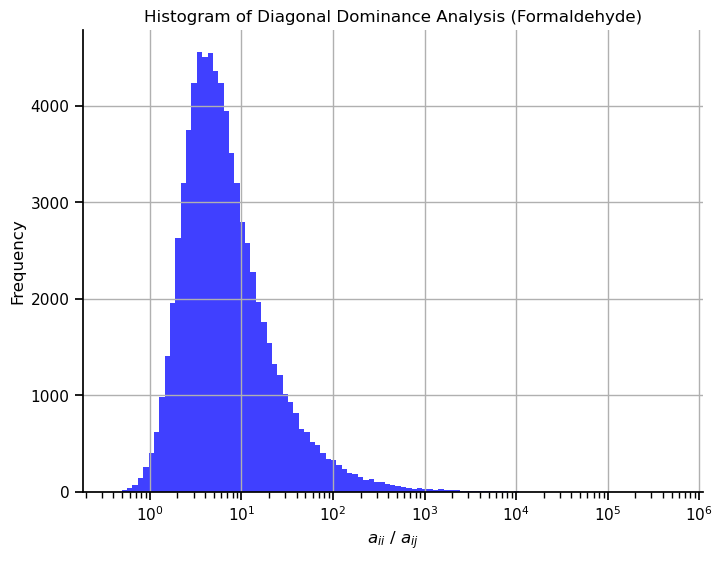

In [63]:
plt.figure(figsize=(8, 6))
bins = np.logspace(np.log10(sampled_values.min()[0]), np.log10(sampled_values.max()[0]), num=int(np.log10(sampled_values.max()[0]) - np.log10(sampled_values.min()[0]) + 100))
sns.histplot(sampled_values[0], bins=bins, color='blue')        
plt.xscale('log')
plt.xlabel(r"$a_{ii}$ / $a_{ij}$")
plt.ylabel("Frequency")
plt.title("Histogram of Diagonal Dominance Analysis (Formaldehyde)")
plt.grid(True)
sns.despine()
plt.savefig(f"{folder}/histo_diag_dom_formaldehyde_sampled.pdf")
plt.show()

# Uracile   

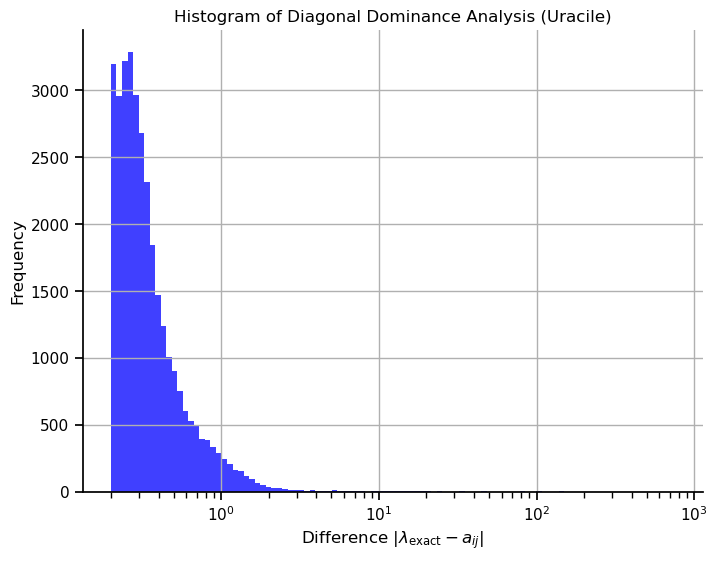

In [64]:
# histogram of the first column
plt.figure(figsize=(8, 6))
bins = np.logspace(np.log10(ev_analysis_uracile.min()), np.log10(ev_analysis_uracile.max()), num=int(np.log10(ev_analysis_uracile.max()) - np.log10(ev_analysis_uracile.min()) + 100))
sns.histplot(ev_analysis_uracile, bins=bins, color='blue')
plt.xscale('log')
plt.title("Histogram of Diagonal Dominance Analysis (Uracile)")
plt.xlabel(r"Difference $|λ_{\text{exact}} - a_{ij}|$")
plt.ylabel("Frequency")
plt.grid(True)
sns.despine()
plt.savefig(f"{folder}/histo_diag_dom_uracile.pdf")
plt.show()

In [65]:
indices = df_uracil.index

sampled_indices = indices[::10000]
sampled_values = df_uracil.iloc[sampled_indices]

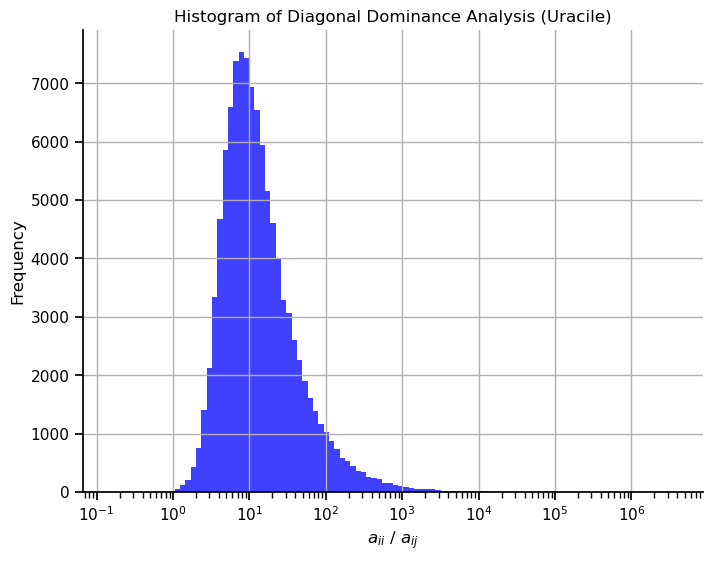

In [66]:
plt.figure(figsize=(8, 6))
bins = np.logspace(np.log10(sampled_values.min()[0]), np.log10(sampled_values.max()[0]), num=int(np.log10(sampled_values.max()[0]) - np.log10(sampled_values.min()[0]) + 100))
sns.histplot(sampled_values[0], bins=bins, color='blue')        
plt.xscale('log')
plt.xlabel(r"$a_{ii}$ / $a_{ij}$")
plt.ylabel("Frequency")
plt.grid(True)
sns.despine()
plt.title("Histogram of Diagonal Dominance Analysis (Uracile)")
plt.savefig(f"{folder}/histo_diag_dom_uracile_sampled.pdf")
plt.show()